In [1]:
#https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv


# TODO:

11/18/21

Run PCA on the CountVectorized, Titles and Descriptions as two different experiments 

Run KMeans on the PCA output 

Plot the PCA clusters 

Build a Logistic Regression model and Naive Bayes Model predicting KMeans classes 

Build A logistic Regression Model for predicting good vs bad videos (Good video is any video with more a like / dislike ratio of above 90)


In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("USvideos.csv",encoding='ISO-8859-1')
data=np.asarray(data)

In [4]:
data.shape

(40949, 16)

In [5]:
data=data[:10000,:]

In [6]:
data.shape

(10000, 16)

In [7]:
X=np.array(data[:,9:11])

In [8]:
X

array([[2966, 15954],
       [6146, 12703],
       [5339, 8181],
       ...,
       [63, 82],
       [254, 1130],
       [103, 1498]], dtype=object)

In [9]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [10]:
random_state = 170

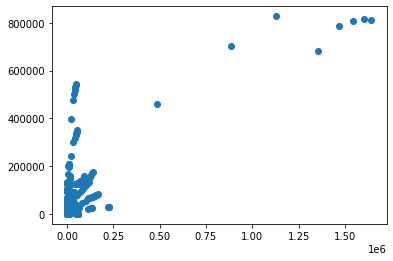

In [11]:
plt.scatter(X[:,0],X[:,1], label='True Position')

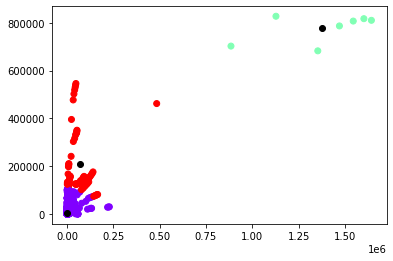

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer = CountVectorizer()

#title
X2 = vectorizer.fit_transform(data[:,2])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression(random_state=0).fit(X2,kmeans.labels_)

In [24]:
clf.score(X2,kmeans.labels_)

0.9989

In [18]:
#channel
X3 = vectorizer.fit_transform(data[:,3])

In [19]:
clf2 = LogisticRegression(random_state=0).fit(X3,kmeans.labels_)

In [20]:
clf2.score(X3,kmeans.labels_)

0.995

In [25]:
#title is more significant than channel name in terms of determining likes/dislikes

In [26]:
clf.coef_[0].argsort().shape

(5349,)

In [27]:
#3 most important words in title for cluster 1
important=clf.coef_[0].argsort()[clf.coef_[0].argsort().size-3:]
for i in range(important.size):
    print(vectorizer.get_feature_names()[important[i]])

in
video
teaser


In [28]:
#3 most important words in title for cluster 2
important=clf.coef_[1].argsort()[clf.coef_[1].argsort().size-3:]
for i in range(important.size):
    print(vectorizer.get_feature_names()[important[i]])

rewind
shape
youtuberewind


In [29]:
#3 most important words in title for cluster 3
important=clf.coef_[2].argsort()[clf.coef_[2].argsort().size-3:]
for i in range(important.size):
    print(vectorizer.get_feature_names()[important[i]])

twice
shaker
rip


* Run PCA on the CountVectorized, Titles and Descriptions as two different experiments
*  Run KMeans on the PCA output
*  Plot the PCA clusters
* Build a Logistic Regression model and Naive Bayes Model predicting KMeans classes 
* Build A logistic Regression Model for predicting good vs bad videos (Good video is any video with more a like / dislike ratio of above 90)

In [30]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
title=data[:,2]
y=X2

target_cluster=kmeans.labels_

In [32]:
pca = PCA(n_components=3)
title_r = pca.fit(X2.toarray()).transform(X2.toarray())

In [34]:
title_r

array([[-0.37973259,  0.6978439 ,  0.3071922 ],
       [ 0.74378904,  0.073574  , -0.16703094],
       [-0.30050289, -0.09662267, -0.11942043],
       ...,
       [-0.24969358, -0.10005497, -0.24426473],
       [ 0.68009285, -0.06499712,  0.00951601],
       [-0.30175278, -0.089416  , -0.17349429]])

In [35]:
# Percentage of variance explained for each components
print('explained variance ratio (first 3 components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first 3 components): [0.03764823 0.01745157 0.01425343]


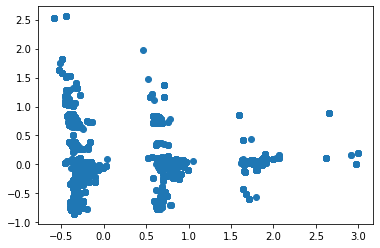

In [36]:
plt.scatter(title_r[:,0],title_r[:,1])

In [79]:
vectorizer.get_feature_names()

plt.figure()
colors = ['navy', 'turquoise', 'darkorange','red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_cluster):
    plt.scatter(title_r[y == i, 0], title_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_cluster)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 432x288 with 0 Axes>

# TODO:

12/2/21

Run PCA on the CountVectorized, Titles and Descriptions as two different experiments

Run KMeans on the PCA output

Plot the PCA clusters

Build a Logistic Regression model and Naive Bayes Model predicting KMeans classes

Build A logistic Regression Model for predicting good vs bad videos (Good video is any video with more a like / dislike ratio of above 90)



In [47]:
pca = PCA(n_components=2)
title_r = pca.fit(X2.toarray()).transform(X2.toarray())


In [57]:
data[0,7]

748374

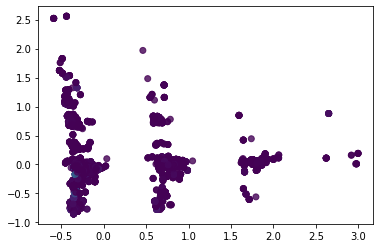

In [62]:
plt.scatter(title_r[:,0],title_r[:,1], alpha=.8,c=data[:,7])

In [63]:
target_names=kmeans.labels_

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(title_r[y == i, 0], title_r[y == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

/home/user/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 432x288 with 0 Axes>

In [37]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(title_r)

In [38]:
y_pred

array([2, 1, 0, ..., 0, 1, 0], dtype=int32)

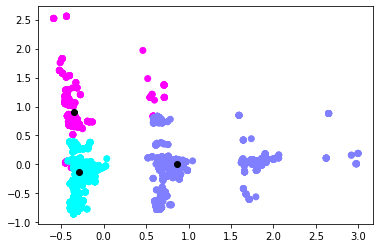

In [44]:
kmeans.fit(title_r)
plt.scatter(title_r[:,0], title_r[:,1], c=kmeans.labels_, cmap='cool')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
